In [1]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import *
from validation import *
from plots import *
from features_ext import *
import pickle

In [11]:
k_exponents_deg2 = exponents(x.shape[1], 2, 10, non_interaction_first=True)
len(k_exponents_deg2)

45

# REMARK
From the previous analysis we found good hyperparameters:
batch_size = 20000
gamma = 1e-6

Now we look if these values are affected when using dditional features

In [2]:
#load the data
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=False
        )
#we keep the data unstandardized to allow for polynomial features creation (_u suffix)

#split the data into train and test:
x_train_u, y_train, x_test_u, y_test = split_data(tx_train, y_train, 0.8, verbose=True, )

# create the standardized version of the datasets
x_train, _, _ = standardize(x_train_u)
x_test, _, _ = standardize(x_test_u)

#conver the values of y
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.

print('x_train, x_test:', x_train_u.shape, x_test_u.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

ration:	 0.8
ratio of y == 1 1st subset:	 0.34
ratio of y == 1 2nd subset:	 0.34
x_train, x_test: (200000, 30) (50000, 30)
y_train, y_test: (200000,) (50000,)
values of y_train values of y_test {0.0, 1.0} {0.0, 1.0}


In [3]:
#Check on the normalization of the splitted sets

print('Stndardized set')
print('Trian mean of means: ', x_train.mean(axis = 0).mean(), 'Train mean of stds:', x_train.std(axis = 0).mean())
print('Test mean of means: ',x_test.mean(axis = 0).mean(), 'Test mean of stds:',x_test.std(axis = 0).mean())

print('Unstandardized set')
print('Trian mean of means: ', x_train_u.mean(axis = 0).mean(), 'Train mean of stds:', x_train.std(axis = 0).mean())
print('Test mean of means: ',x_test_u.mean(axis = 0).mean(), 'Test mean of stds:',x_test.std(axis = 0).mean())

Stndardized set
Trian mean of means:  -4.143712924028694e-13 Train mean of stds: 0.9999999999999665
Test mean of means:  2.9925987283794845e-14 Test mean of stds: 0.9999999999999303
Unstandardized set
Trian mean of means:  47.27479411965901 Train mean of stds: 0.9999999999999665
Test mean of means:  47.30499088082809 Test mean of stds: 0.9999999999999303


# First approach
Add non interacting terms of various degree

## Degree 2

In [130]:
clfiers_degree = []
for d in range(2, 11):
        x_train_e, x_test_e = build_poly_and_standardize(x_train_u, x_test_u, d)
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= 1e-1,
                max_iterations=2500,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
        )
        clf.train(y_train, x_train_e, 
                batch_size=20000, 
                verbose = True, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)
        clfiers_degree += [clf]

with open('clf_degree_2.pkl', 'wb') as outp:
        pickle.dump(clfiers_degree, outp, pickle.HIGHEST_PROTOCOL)

Current iteration=0, loss=2.096990254304145
Current iteration=100, loss=1.4836624861825873
Current iteration=200, loss=1.4522513306155367
Current iteration=300, loss=1.4348825943139443
Current iteration=400, loss=1.4227769191731405
Current iteration=500, loss=1.4138704263982171
Current iteration=600, loss=1.4069944393037574
Current iteration=700, loss=1.4014470699400805
Current iteration=800, loss=1.3968368388377643
Current iteration=900, loss=1.3929237211805134
Current iteration=1000, loss=1.3895526632034083
Current iteration=1100, loss=1.3866158289560984
Current iteration=1200, loss=1.384030351523576
Current iteration=1300, loss=1.3817293518828737
Current iteration=1400, loss=1.37966358164866
Current iteration=1500, loss=1.3777972637287328
Current iteration=1600, loss=1.3761026618165155
Current iteration=1700, loss=1.3745573398011806
Current iteration=1800, loss=1.3731426606214858
Current iteration=1900, loss=1.3718429179878666
Current iteration=2000, loss=1.3706447609071086
Current 

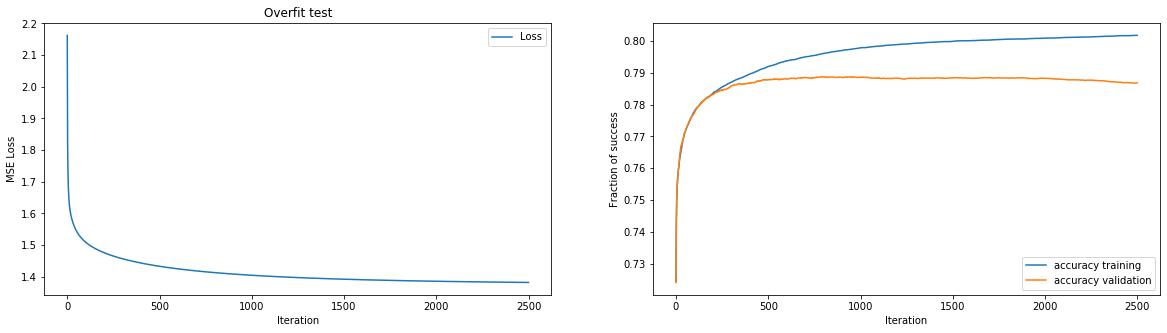

In [119]:
selector = 0
training_plots(clfiers_degree[selector])
selector += 1

In [5]:
with open('clf_degree.pkl', 'rb') as inpt:
    first_list =pickle.load(inpt)
with open('clf_degree_2.pkl', 'rb') as inpt:
    second_list =pickle.load(inpt)
len(first_list), len(second_list)
clfiers_degree_list = first_list + second_list
len(clfiers_degree_list)


9

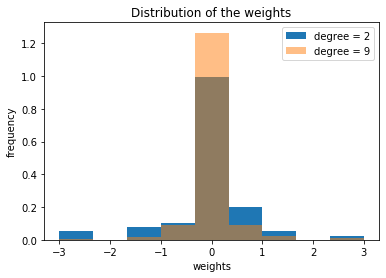

In [6]:
bins = np.linspace(-3, 3, 10)
_ = plt.hist(clfiers_degree_list[0].params['weights'], density=True, alpha = 1., bins = bins, label = 'degree = 2')
_ = plt.hist(clfiers_degree_list[-1].params['weights'], density=True,  alpha = 0.5, bins = bins, label = 'degree = 9')
plt.title('Distribution of the weights')
plt.xlabel('weights')
plt.ylabel('frequency')
plt.legend()

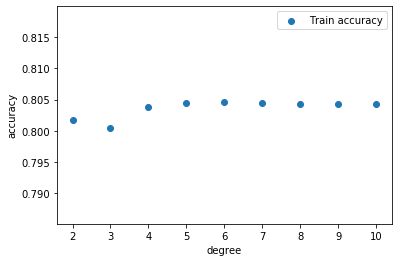

In [9]:
d = [i for i in range(2, 11)]
acc_te = [clfiers_degree_list[i].params['accuyracues_while_training_validation'][-1] for i in range(9)]
acc_tr = [clfiers_degree_list[i].params['accuyracues_while_training_train'][-1] for i in range(9)]
plt.scatter(d, acc_te, label = 'Test Accuracy')
plt.scatter(d, acc_tr, label = 'Train accuracy')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [204]:
#visualizing results
import pickle
with open('../results/overfit_degre_1.pkl', 'rb') as inpt:
    results1 = pickle.load(inpt)

with open('../results/overfit_degre_2.pkl', 'rb') as inpt:
    results2 = pickle.load(inpt)

with open('../results/overfit_degre_3.pkl', 'rb') as inpt:
    results3 = pickle.load(inpt)
results = results1 + results2 + results3
type(results)

list

In [182]:
accuracies_train_mean.shape, accuracies_train_std.shape, len(degree)

((9,), (9,), 8)

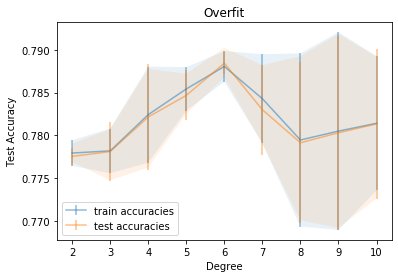

In [199]:
#acc_tr, acc_te, loss_tr, loss_te
accuracies_train_mean = np.array([np.array(r[0]).mean() for r in results])
accuracies_train_std =  np.array([np.array(r[0]).std() for r in results])
accuracies_test_mean = np.array([np.array(r[1]).mean() for r in results])
accuracies_test_std =  np.array([np.array(r[1]).std() for r in results])
degree = [i for i in range(2, 11)]
plt.errorbar(degree, accuracies_train_mean, yerr = accuracies_train_std, label = 'train accuracies', alpha = 0.5)
plt.errorbar(degree, accuracies_test_mean, yerr = accuracies_test_std, label = 'test accuracies', alpha = 0.5)
plt.fill_between(degree, accuracies_train_mean -accuracies_train_std, accuracies_train_mean +accuracies_train_std, alpha = 0.1 )
plt.fill_between(degree, accuracies_train_mean -accuracies_test_std, accuracies_test_mean +accuracies_train_std, alpha = 0.1 )
plt.legend(loc = 'lower left')
plt.xlabel('Degree')
plt.ylabel('Test Accuracy')
_ = plt.title('Overfit')

In [268]:
with open('../results/logreg_gridsearch_hyp.txt', 'rb') as inpt:
    results = pickle.load(inpt)

In [271]:
results[0].keys()

dict_keys(['dataset', 'learning rate', 'batch_size', 'w_initial distr', 'acc_tr', 'acc_te', 'losses_tr', 'losses_te'])

In [276]:
for r in 

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [267]:
import numpy as np 
accuracies = []
accuracies = np.ones((1, 2))
for r in results:
    accuracy = np.array(r['acc_te']).reshape(1, -1)
    acc = np.zeros((1, 2))
    acc[0, 0] = accuracy.mean()
    acc[0, 1] = accuracy.std()
    accuracies = np.concatenate((accuracies, acc), axis = 0)
accuracies = accuracies[1:]
upto = 10
accuracies[np.argpartition(-accuracies[:, 0], 55)[:upto]]
best = [results[i] for i in np.argsort(-accuracies[:, 0])[:upto]]
for r in best:
    print('learning rate', r['learning rate'])
    print('distr', r['w_initial distr'])
    print('batch_s', r['batch_size'])
    print('accuracy', np.array(r['acc_tr']).mean() ,'+/-', np.round(np.array(r['acc_tr']).std(), 5))
    print('#####################################à')



learning rate 0.14677992676220705
distr normal
batch_s 20000
accuracy 0.7513333333333333 +/- 0.00164
#####################################à
learning rate 6.812920690579608e-05
distr normal
batch_s 20000
accuracy 0.7506773333333333 +/- 0.00045
#####################################à
learning rate 6.812920690579608e-05
distr normal
batch_s 10000
accuracy 0.7507133333333332 +/- 0.00051
#####################################à
learning rate 1e-05
distr normal
batch_s -1
accuracy 0.7503146666666667 +/- 0.0006
#####################################à
learning rate 6.812920690579608e-05
distr zero
batch_s 20000
accuracy 0.750592 +/- 0.00046
#####################################à
learning rate 6.812920690579608e-05
distr zero
batch_s 10000
accuracy 0.750612 +/- 0.0005
#####################################à
learning rate 1e-05
distr normal
batch_s 50000
accuracy 0.750448 +/- 0.00054
#####################################à
learning rate 1e-05
distr normal
batch_s 20000
accuracy 0.7504546666666667 +/- 

[0.14677992676220705, 1.0, 1e-05, 0.021544346900318846, 0.0031622776601683794, 6.812920690579608e-05, 0.0004641588833612782]


C:\Users\fabri\Anaconda3\envs\tirocinio\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


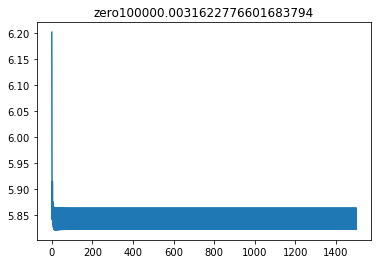

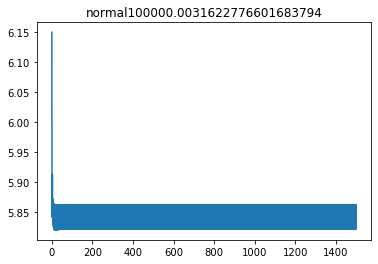

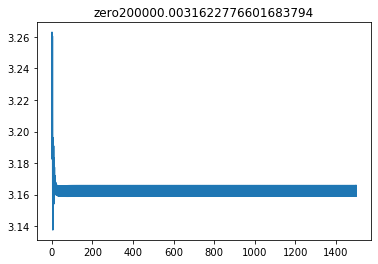

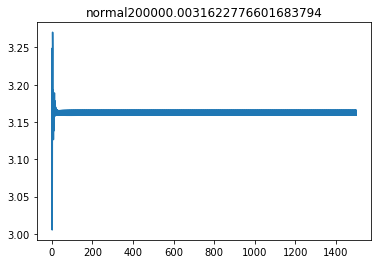

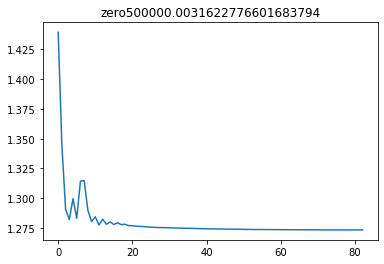

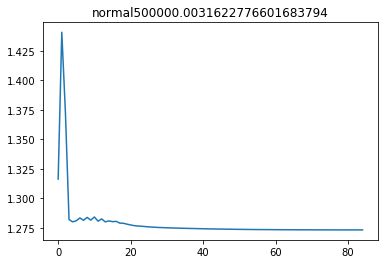

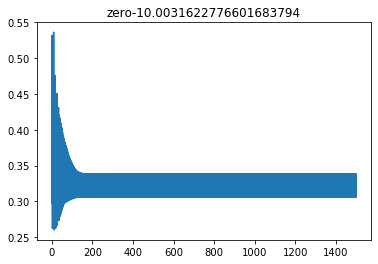

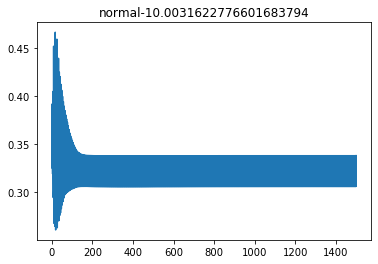

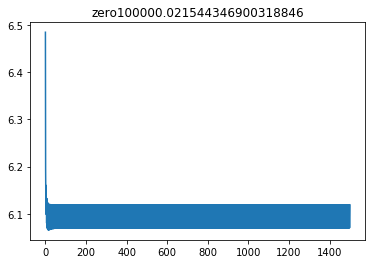

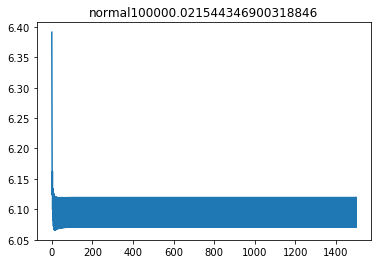

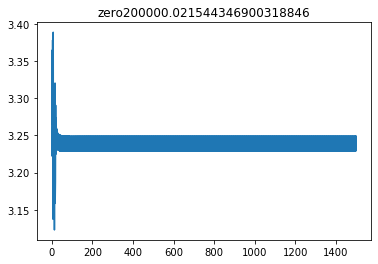

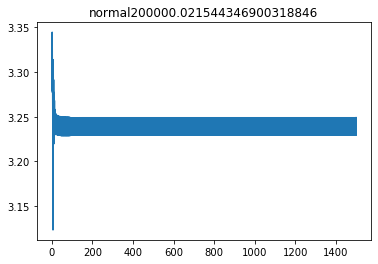

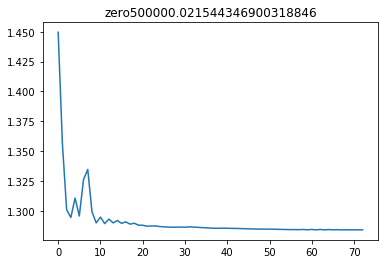

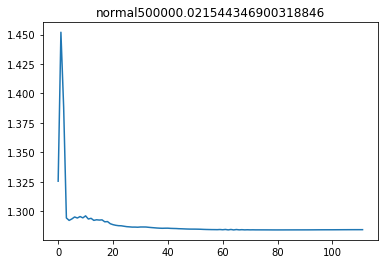

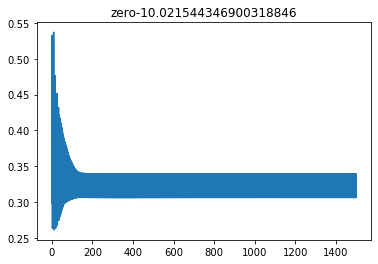

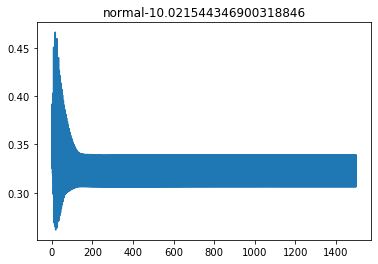

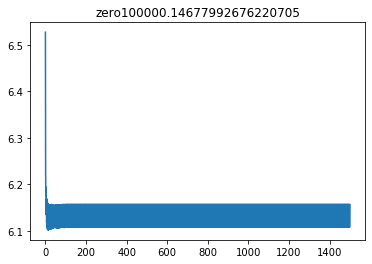

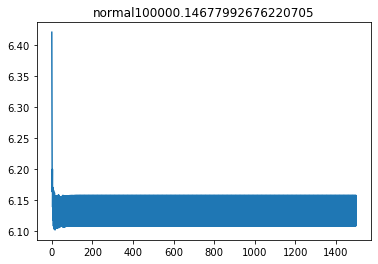

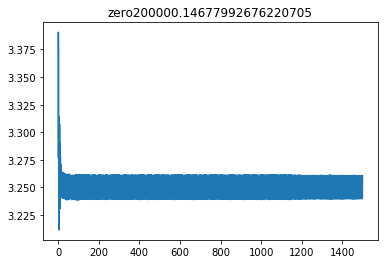

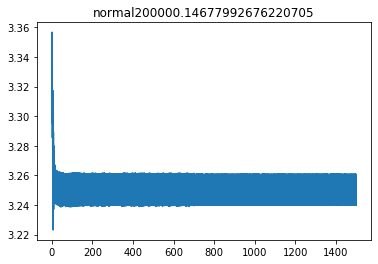

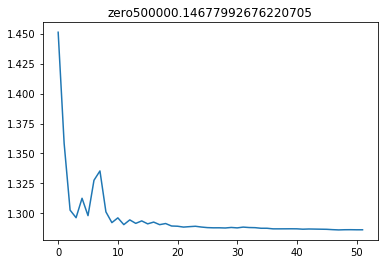

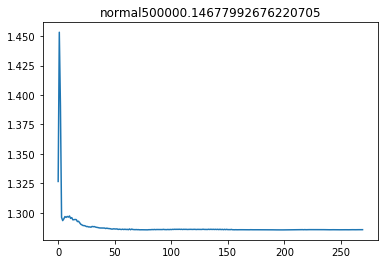

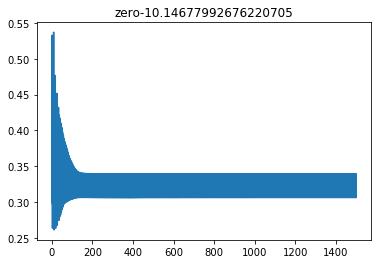

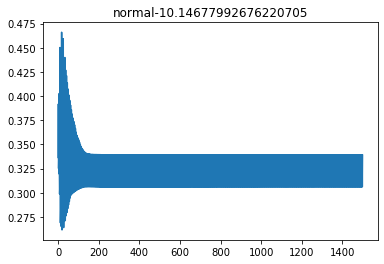

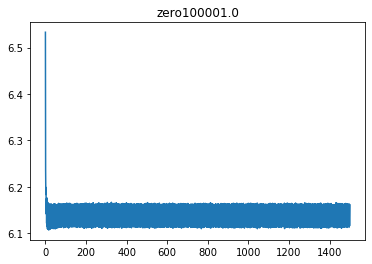

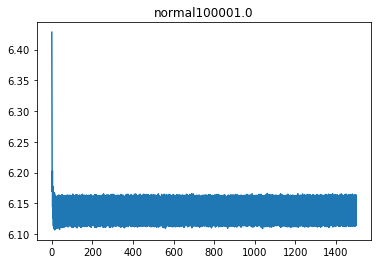

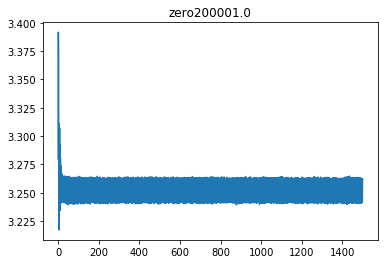

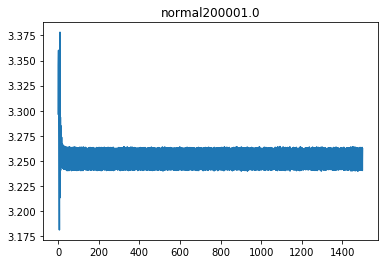

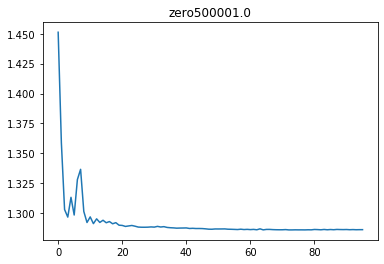

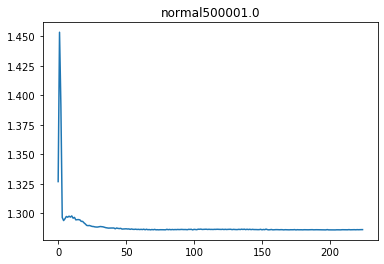

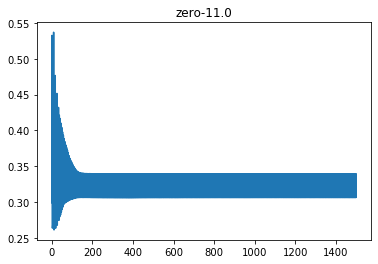

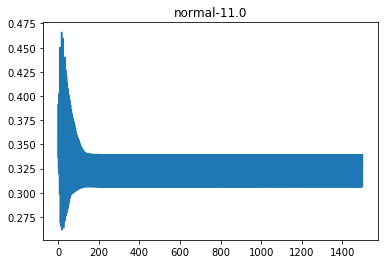

In [307]:
l_rates = []
for r in results:
    l_rates += [r['learning rate']]
print(list(set(l_rates)))

for r in results:
    if r['learning rate'] > 10**-3:
        fig = plt.figure()
        plt.plot(r['losses_tr'][0])
        plt.title(r['w_initial distr']+ str(r['batch_size'])+ str(r['learning rate']))

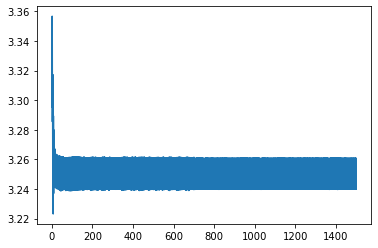

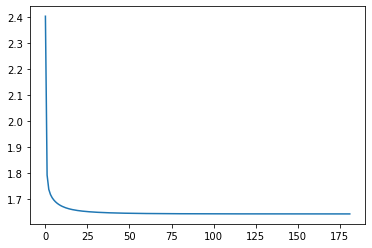

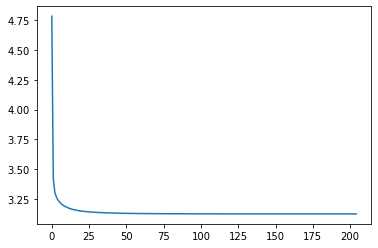

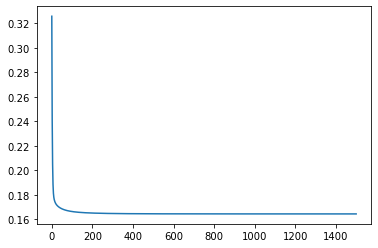

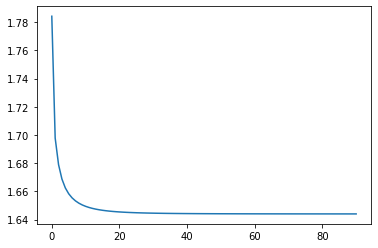

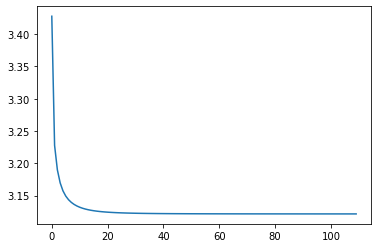

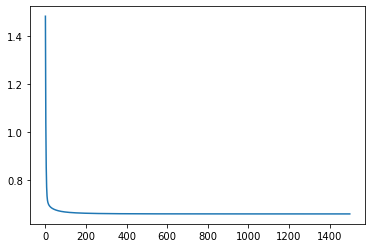

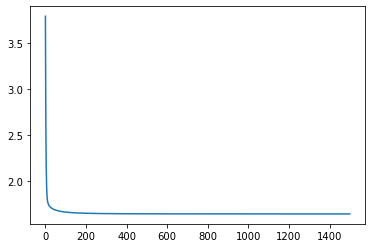

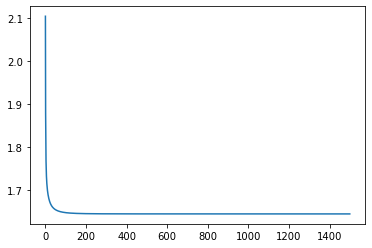

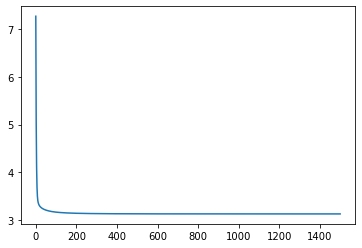

In [293]:
for i in np.argsort(-accuracies[:, 0])[:upto]:
    fig = plt.figure()
    plt.plot(results[i]['losses_tr'][0])
    

In [279]:
beast[0]['losses_tr']

TypeError: only integer scalar arrays can be converted to a scalar index

11
6.812920690579608e-05


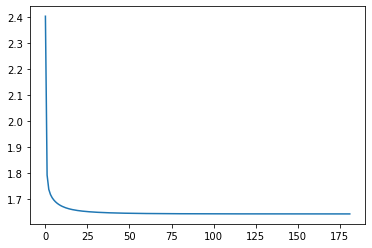

In [237]:
import matplotlib.pyplot as plt
select = np.random.choice(np.arange(len(results)))
print(select)
print(results[select]['learning rate'])
plt.plot(np.arange(len(results[select]['losses_tr'][0])), results[select]['losses_tr'][0])
#plt.plot(np.arange(len(best[0]['losses_tr'][0])), best[0]['losses_te'][0])

In [95]:
#train set 
#expand the input with 10 new features
k_exponents =  exponents(n_variables = x_train.shape[1], degree = 2, n_features=10, non_interaction_first=False)

clfiers = []
for i in range(len(k_exponents)):
        print('Training numer', i)
        interactions =  gen_new_features(x_train, k_exponents[i])
        x_train_e = np.concatenate((x_train, interactions), axis = 1)
        x_train_e = np.concatenate((np.ones_like(x_train[:, 0]).reshape(-1, 1), x_train_e), axis = 1)
        #test set 
        interactions =  gen_new_features(x_test, k_exponents[i])
        x_test_e = np.concatenate((x_test, interactions), axis = 1)
        x_test_e = np.concatenate((np.ones_like(x_test_e[:, 0]).reshape(-1, 1), x_test_e), axis = 1)

        print(x_train_e.shape, x_test_e.shape)
        #classify 
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= 5e-5,
                max_iterations=3000,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=0#1e-8,
        )
        clf.train(y_train, x_train_e, 
                batch_size=20000, 
                verbose = False, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)
        clfiers += [clf]
                
        training_plots(clf, show_gradient=True)

NameError: name 'exponents' is not defined

## Initializing with uniform Solves numerical problems

Check on expanded shapes (200000, 61) (50000, 61)
Current iteration=0, loss=0.3577152298734423
Current iteration=100, loss=0.326433176778759


<Figure size 432x288 with 0 Axes>

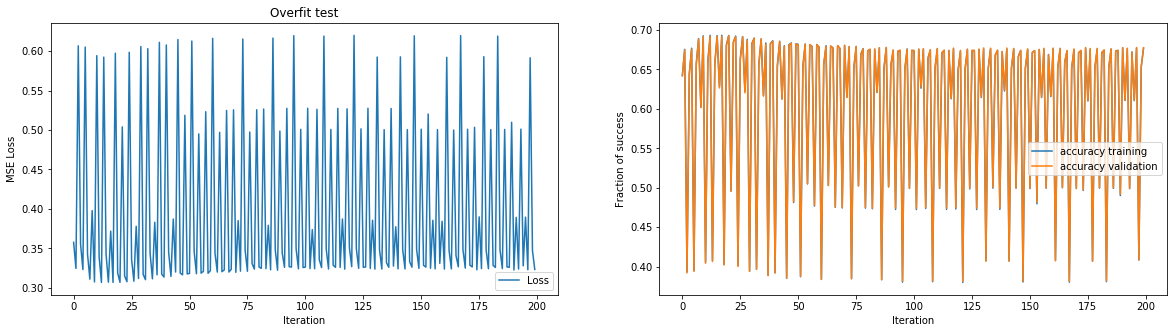

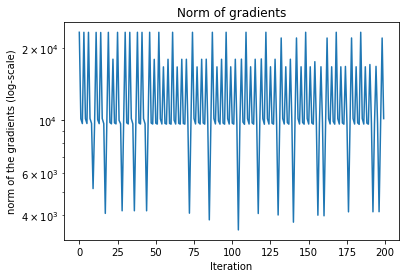

Current iteration=0, loss=0.605509969601683
Current iteration=100, loss=0.32232348189359444


<Figure size 432x288 with 0 Axes>

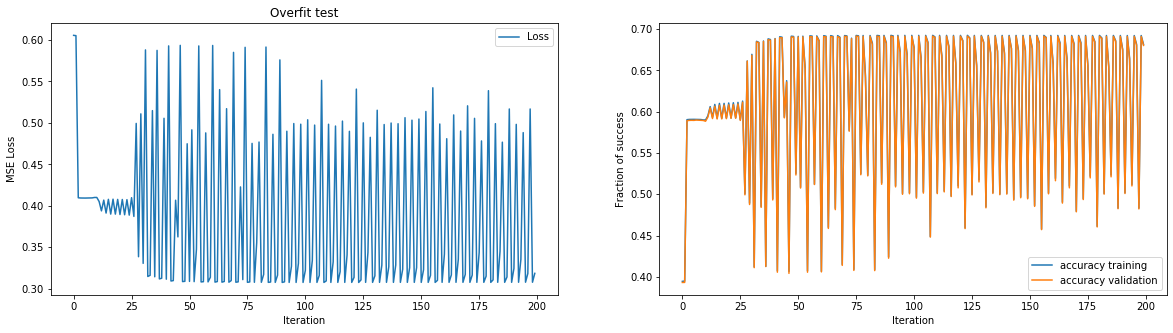

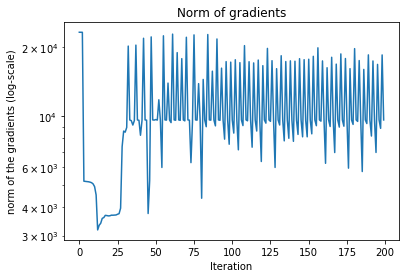

Current iteration=0, loss=0.3757317302889726
Current iteration=100, loss=0.5052980121339194
hit thresh


<Figure size 432x288 with 0 Axes>

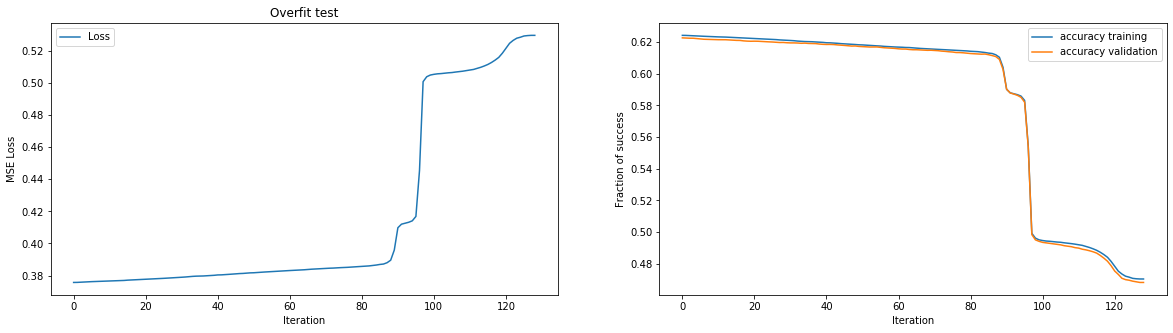

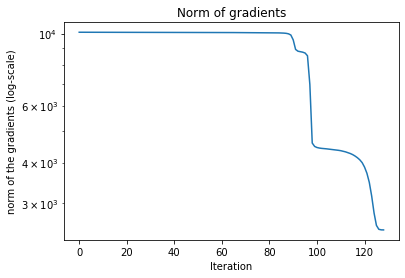

Current iteration=0, loss=0.3522373735838765
hit thresh


<Figure size 432x288 with 0 Axes>

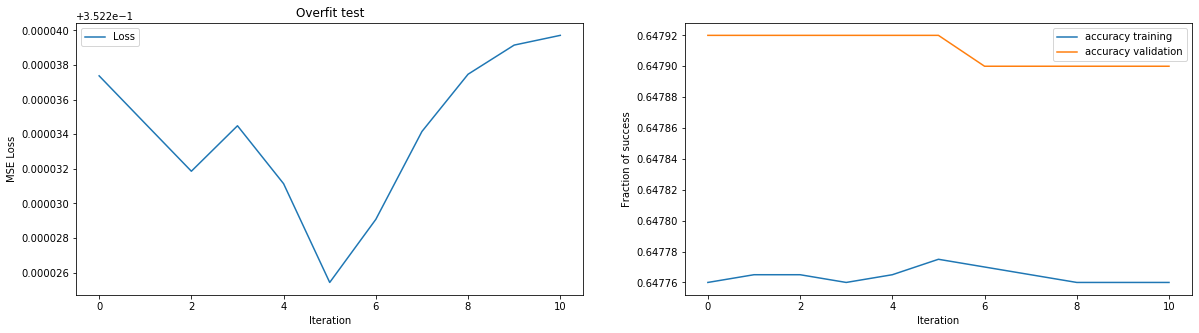

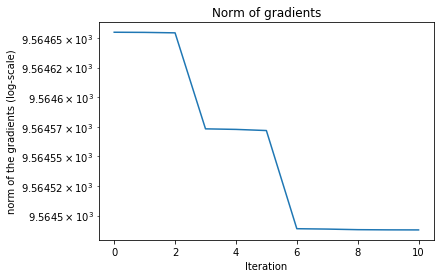

In [6]:
#expand the input
degree = 2
x_train_e = build_poly_standard(x_train, degree)
x_test_e = build_poly_standard(x_test, degree)
print('Check on expanded shapes', x_train_e.shape, x_test_e.shape)

gammas = [1e-6, 1e-7, 1e-8, 1e-9]#, 1e-10]
for gamma in gammas:
        #classify 
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= gamma,
                max_iterations=200,
                min_max_iterations = 300,
                w_sampling_distr='uniform',
                threshold=1e-6,
        )
        clf.train(y_train, x_train_e, 
                batch_size=-1, 
                verbose = True, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)

        figure = plt.figure()
        training_plots(clf, show_gradient=True)

## Initializing with zero adds a lot of numerical problems

Check on expanded shapes (200000, 61) (50000, 61)
Current iteration=0, loss=0.34245
Current iteration=100, loss=0.6274789497652037


<Figure size 432x288 with 0 Axes>

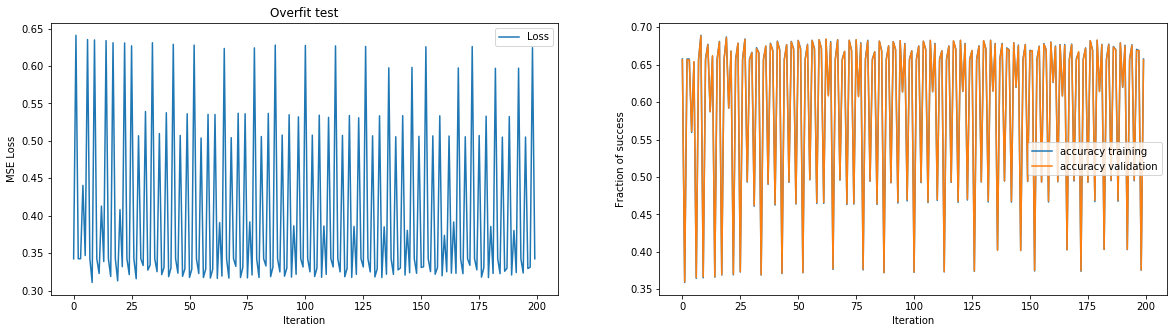

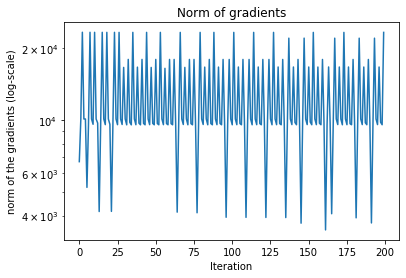

Current iteration=0, loss=0.34245
Current iteration=100, loss=0.6274338969138343


<Figure size 432x288 with 0 Axes>

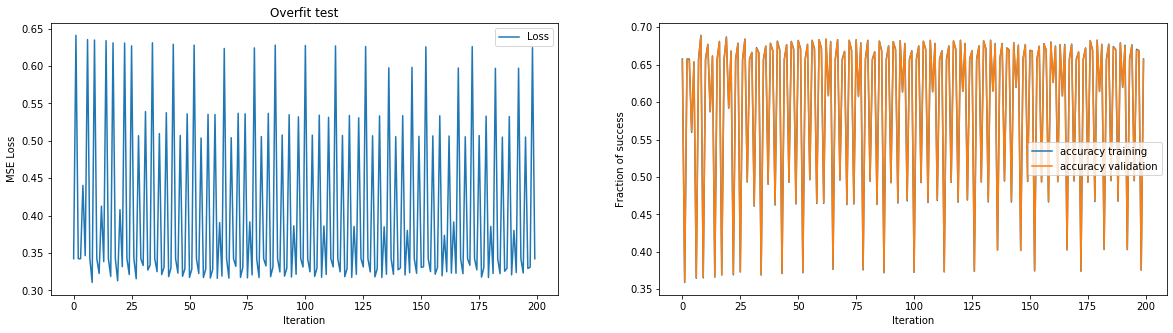

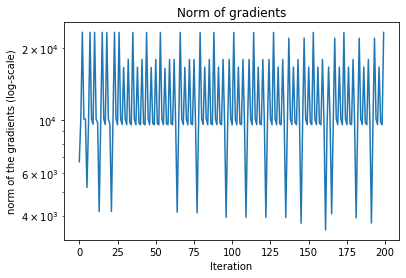

Current iteration=0, loss=0.3424499952096419
Current iteration=100, loss=0.6269885954273143


<Figure size 432x288 with 0 Axes>

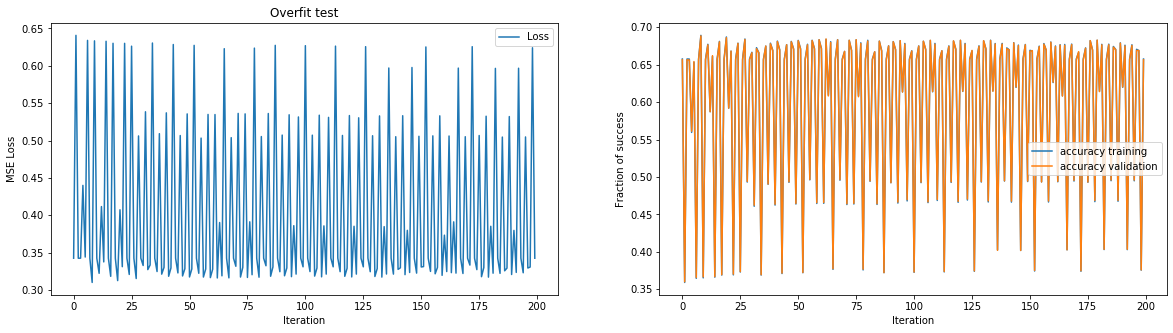

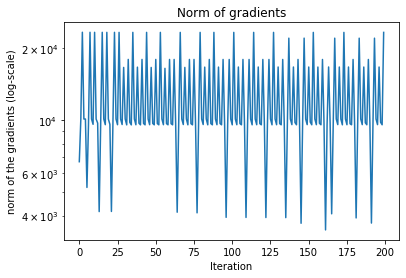

Current iteration=0, loss=0.3402761582706405
Current iteration=100, loss=0.6223755235587716


KeyboardInterrupt: 

In [5]:
#expand the input
degree = 2
x_train_e = build_poly_standard(x_train, degree)
x_test_e = build_poly_standard(x_test, degree)
print('Check on expanded shapes', x_train_e.shape, x_test_e.shape)

gammas = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for gamma in gammas:
        #classify 
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= gamma,
                max_iterations=200,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
        )
        clf.train(y_train, x_train_e, 
                batch_size=-1, 
                verbose = True, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)

        figure = plt.figure()
        training_plots(clf, show_gradient=True)